# 0. Magic Commands


In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# 1. Import Library

In [2]:
from fastai import *
from fastai.vision import *
from fastai.metrics import accuracy

# 2. ข้อมูล

ใช้ชุดข้อมูล Dataset [MNIST](http://yann.lecun.com/exdb/mnist/) ตัวเลขอารบิคเขียนด้วยลายมือ

In [3]:
path = untar_data(URLs.MNIST_SAMPLE)

# 3. เตรียมข้อมูล



In [4]:
batchsize = 64
np.random.seed(55)
transform = get_transforms(do_flip=False)

databunch = ImageDataBunch.from_folder(path, train='training', 
                                       valid_pct=0.2, size=28, 
                                       ds_tfms=transform, bs=batchsize, 
                                       num_workers=8).normalize()

# 4. สร้างโมเดล

เพื่อความสะดวก เราจะไปสร้างก่อน fit แต่ละแบบ

* เคสนี้เราจะใช้โมเดล models.vgg16_bn คือ โมเดลชื่อว่า VGGNet มี 16 Layers จากปี 2014 ซึ่งเป็นโมเดลที่เก่ากว่า เก่งน้อยกว่า Resnet จะได้เห็นกราฟ Loss ได้ชัดขึ้น
* pretrained=False หมายถึง เราจะเริ่มเทรนตั้งแต่ต้น ไม่เอา Weight ที่เคยเทรนกับ ImageNet มาแล้วมาใช้

In [5]:
# learner = cnn_learner(databunch, models.vgg16_bn, 
#                       pretrained=False, 
#                       metrics=accuracy, callback_fns=ShowGraph)

# 5. เริ่มต้นเทรนโมเดล

ปกติ Learning Rate จะมีค่า Default ประมาณ 3e-3 หรือ 0.003 เราจะลองเทรนด้วย Learning Rate สูงมาก และต่ำมาก เปรียบเทียบกับ [Image Classification ep.3](https://www.bualabs.com/archives/509/mnist-fastai-resnet18-image-classification-ep-3/) ดูว่าจะเป็นอย่างไร

## ลองเทรนด้วย Learning Rate สูง ๆ เช่น 0.1

epoch,train_loss,valid_loss,accuracy,time
0,0.172108,0.035146,0.987526,00:06
1,0.108255,0.591671,0.844421,00:05
2,0.448967,0.103765,0.984754,00:05
3,0.041799,0.007084,0.997575,00:05
4,0.334000,0.082108,0.996881,00:05
5,0.318117,0.164495,0.991684,00:05
6,0.208653,0.135204,0.993416,00:05
7,0.335687,0.172472,0.992377,00:05
8,0.327184,0.191336,0.994110,00:05
9,0.412542,0.268139,0.996189,00:05


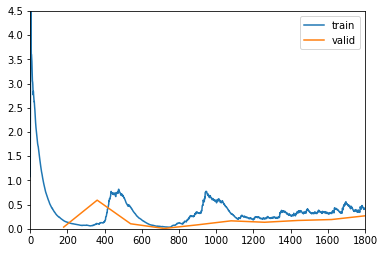

In [6]:
learner = cnn_learner(databunch, models.vgg16_bn, 
                      pretrained=False, 
                      metrics=accuracy, callback_fns=ShowGraph)
learner.fit(10, lr=0.1)

Weight ของ Model ถูกลบด้วยค่าที่ใหญ่เกินไป ซ้ำ ๆ เหมือนถูกระเบิดออก ทำให้ Loss กระเด้งไปมา ไม่ลงสู่จุดต่ำสุด 

บางที Weight ระเบิดมากเกินกว่าที่ตัวเลขในคอมพิวเตอร์ จะรับได้ จะกลายเป็นค่า NaN หรือ Not a Number ต้อง Restart และเทรนใหม่ตั้งแต่ต้น

## ลองเทรนด้วย Learning Rate ต่ำ ๆ เช่น 0.000001

epoch,train_loss,valid_loss,accuracy,time
0,0.797804,0.691774,0.621275,00:05
1,0.625822,0.571663,0.714830,00:05
2,0.519603,0.495000,0.748094,00:05
3,0.429042,0.396908,0.811504,00:05
4,0.370113,0.315337,0.860707,00:05
5,0.305142,0.276649,0.883229,00:05
6,0.269467,0.244662,0.900554,00:05
7,0.232183,0.210787,0.916840,00:05


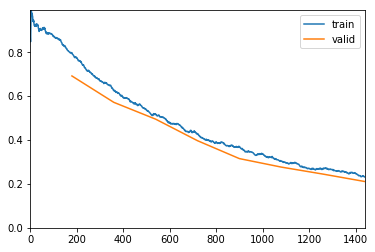

In [7]:
learner = cnn_learner(databunch, models.vgg16_bn, 
                      pretrained=False, 
                      metrics=accuracy, callback_fns=ShowGraph)
learner.fit(8, lr=0.000001)

Weight ของ Model ถูกลบด้วยค่าที่เล็กเกินไป ทำให้ Loss ไม่ขยับไปไหน 

## ลองเทรนด้วย Epoch น้อยเกินไป หรือ เทรนสั้นเกินไป

epoch,train_loss,valid_loss,accuracy,time
0,0.035975,0.039968,0.984061,00:05


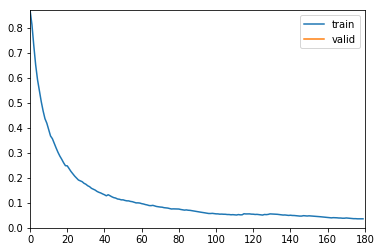

In [8]:
learner = cnn_learner(databunch, models.vgg16_bn, 
                      pretrained=False, 
                      metrics=accuracy, callback_fns=ShowGraph)
learner.fit(1, lr=0.0003)

เทรนสั้นไป ยังไม่ได้อัพเดท Weight สักเท่าไร ทำให้ Loss ไม่ขยับไปไหน 

## ลองเทรนด้วย Epoch เยอะเกินไป หรือ เทรนนานเกินไป

epoch,train_loss,valid_loss,accuracy,time
0,0.049424,0.019733,0.993763,00:05
1,0.025835,0.060189,0.980249,00:05
2,0.025499,0.008783,0.998267,00:05
3,0.021186,0.002940,0.998960,00:05
4,0.022088,0.013214,0.995495,00:06
5,0.013780,0.003507,0.999307,00:05
6,0.017377,0.009216,0.998267,00:05
7,0.017407,0.005806,0.998267,00:05
8,0.011818,0.003791,0.998960,00:05
9,0.007815,0.003056,0.999654,00:05


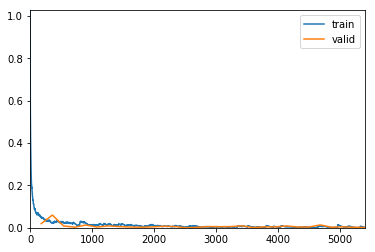

In [9]:
learner = cnn_learner(databunch, models.vgg16_bn, 
                      pretrained=False, 
                      metrics=accuracy, callback_fns=ShowGraph)
learner.fit(30, lr=0.0003)

เทรนนานเกินไป ผลลัพธ์ก็ไม่ได้ดีขึ้น บางทีอาจจะทำให้ Overfit ซึ่งไว้เราจะอธิบายต่อไป

# Credit 

* [FastAI: Practical Deep Learning for Coders, v3 - Lesson 2](https://course.fast.ai/videos/?lesson=2)